# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [1]:
import os
data_path = ['data']

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [222]:
import pandas as pd
fp = 'data/Iris_Data.csv'
data = pd.read_csv(fp)
print(data.iloc[:10,:3])#iloc[linhas,colunas]
print(data.shape)
print(list(data.columns)[0:4])
print(data.dtypes)

   sepal_length  sepal_width  petal_length
0           5.1          3.5           1.4
1           4.9          3.0           1.4
2           4.7          3.2           1.3
3           4.6          3.1           1.5
4           5.0          3.6           1.4
5           5.4          3.9           1.7
6           4.6          3.4           1.4
7           5.0          3.4           1.5
8           4.4          2.9           1.4
9           4.9          3.1           1.5
(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [247]:
data.species.str.replace('Iris-','').iloc[50:60]
#replace apenas para exibir

50    versicolor
51    versicolor
52    versicolor
53    versicolor
54    versicolor
55    versicolor
56    versicolor
57    versicolor
58    versicolor
59    versicolor
Name: species, dtype: object

## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [31]:
data.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [37]:
print(data.mean())

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


In [38]:
data.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [53]:
print(data.quantile())

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [106]:
'''media=list(data.groupby('species').mean())
mediana = list(data.median())
joined=list(zip(media, mediana))
ex4_df = pd.DataFrame(joined,
                      index=list(data.columns)[0:4],
                     columns=['media','mediana'])
print(ex4_df)'''
import numpy as np
grouped = data.groupby('species')
grouped.agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

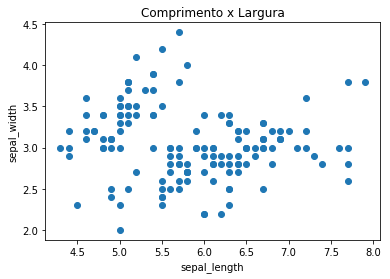

In [127]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set(xlabel='sepal_length', ylabel='sepal_width',
 title='Comprimento x Largura')
plt.plot(data.sepal_length,data.sepal_width,ls='',marker = 'o')


## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

[Text(0,0.5,'frequency'),
 Text(0.5,0,'petal_length'),
 Text(0.5,1,'Histograma comprimento pétalas')]

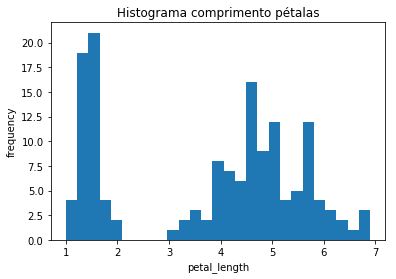

In [151]:
fig,ax = plt.subplots()
plt.hist(data.petal_length, bins=27)
ax.set(xlabel='petal_length', ylabel='frequency',
 title='Histograma comprimento pétalas')

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

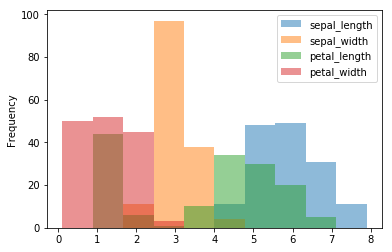

In [150]:
data.plot.hist(alpha=0.5)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

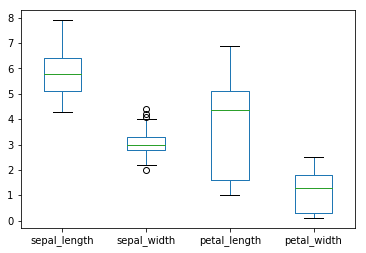

In [152]:
data.plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

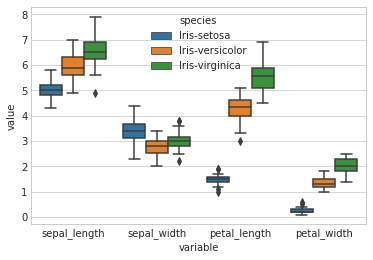

In [254]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="variable", y = "value", hue = "species",data=data.melt(id_vars=['species']))
#tips = sns.load_dataset("tips")
#print(data.melt(id_vars=['species']))
#ax = sns.boxplot(x="day", y="total_bill", hue="time", data=tips, linewidth=2.5)
#print(tips)

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

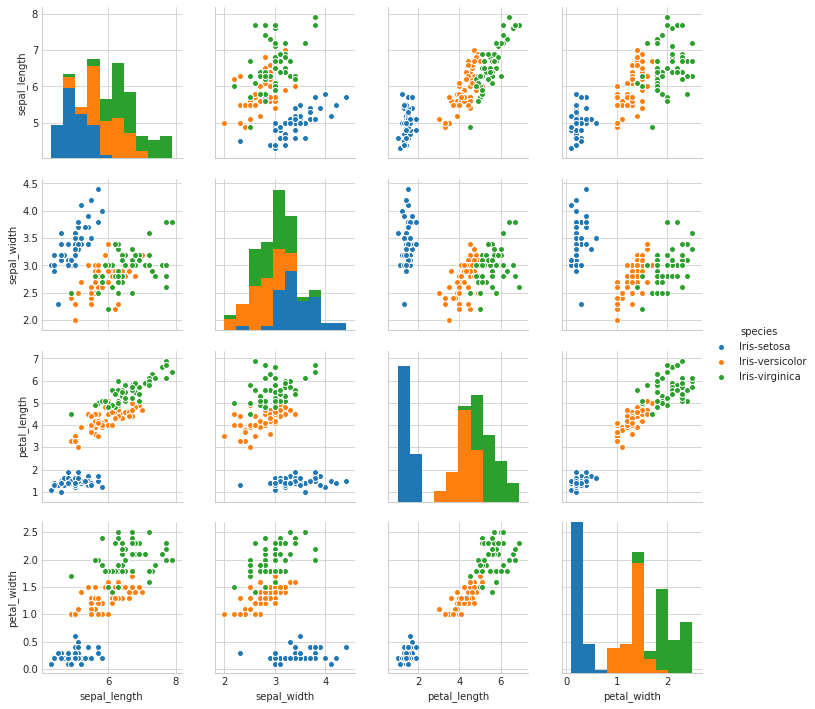

In [213]:
sns.pairplot(data, hue='species')